code from zhuanlan.zhihu.com/p/373022462

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

ImportError: cannot import name 'deserialize_keras_object' from partially initialized module 'keras.saving.legacy.serialization' (most likely due to a circular import) (/home/wuming/anaconda3/envs/paddle_env/lib/python3.8/site-packages/keras/saving/legacy/serialization.py)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

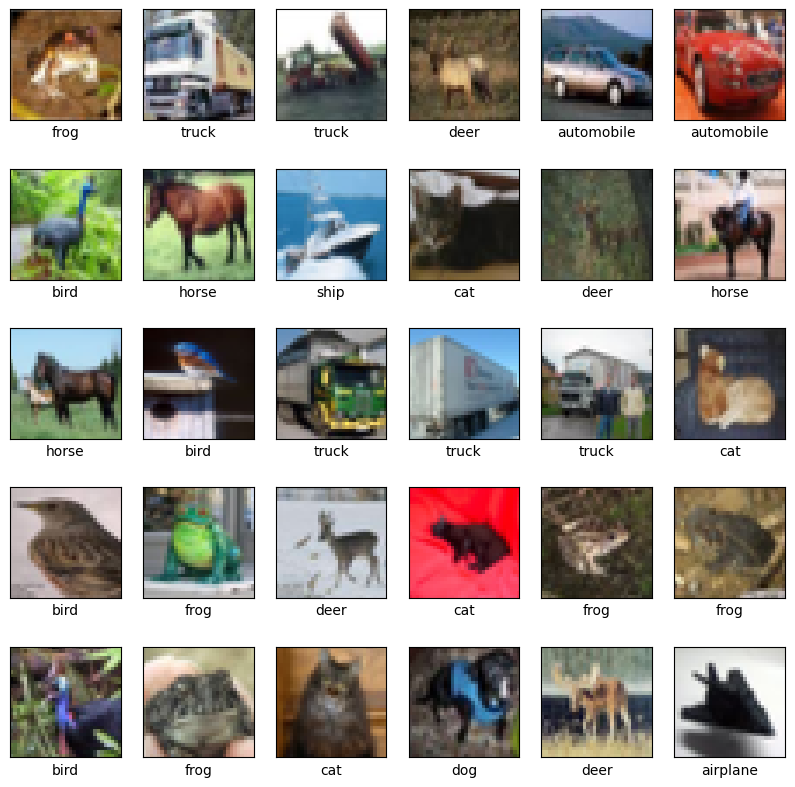

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 由于 CIFAR 的标签是 array， 因此需要额外的索引（index）。
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

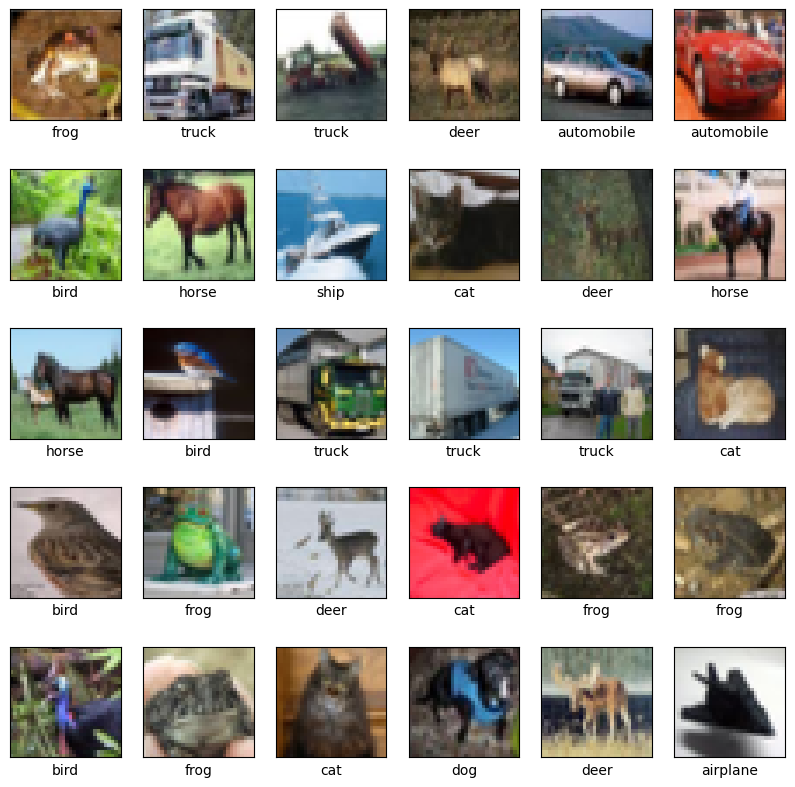

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 由于 CIFAR 的标签是 array， 因此需要额外的索引（index）。
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model

In [ ]:

layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

2023-07-07 08:06:27.868751: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
  13/1563 [..............................] - ETA: 21s - loss: 2.3053 - accuracy: 0.1034

2023-07-07 08:06:29.837948: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2023-07-07 08:06:29.838725: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2023-07-07 08:06:29.861920: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2023-07-07 08:06:29.862541: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


1563/1563 [==============================] - 26s 16ms/step - loss: 1.4917 - accuracy: 0.4595 - val_loss: 1.2012 - val_accuracy: 0.5720
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1395 - accuracy: 0.5991 - val_loss: 1.0510 - val_accuracy: 0.6319
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9905 - accuracy: 0.6541 - val_loss: 1.0076 - val_accuracy: 0.6367
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8939 - accuracy: 0.6893 - val_loss: 0.9219 - val_accuracy: 0.6755
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8202 - accuracy: 0.7139 - val_loss: 0.9067 - val_accuracy: 0.6855
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7624 - accuracy: 0.7344 - val_loss: 0.9424 - val_accuracy: 0.6761
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7159 - accuracy: 0.7499 - val_loss: 0.8788 - val_accura

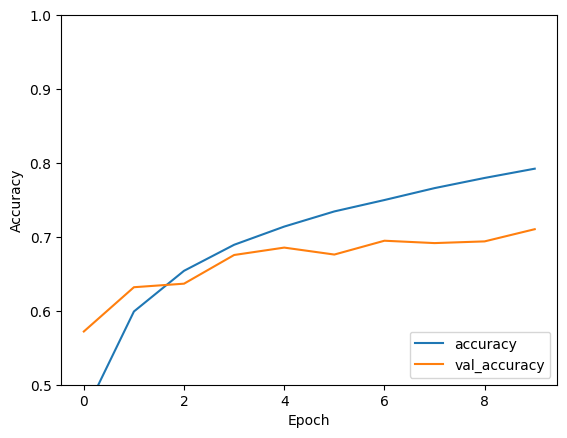

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("测试集的准确度", test_acc)

313/313 - 2s - loss: 0.8865 - accuracy: 0.7104 - 2s/epoch - 6ms/step
测试集的准确度 0.7103999853134155


In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
train_images[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [ ]:
len(train_images)

50000

In [ ]:
len(train_images[0])

32

In [ ]:
len(train_images[0][0])

32

In [ ]:
len(train_images[0][0][0])

3